Plan:
- 

# Plan:
* lala
* lala

In [14]:
import pandas
import ast
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt

In [15]:
applications = pandas.read_csv(
    "EP_Data_Extended.csv", quotechar='"', skipinitialspace=True, low_memory=False
)
data_trackers = pandas.read_csv(
    "data_trackers.csv", quotechar='"', skipinitialspace=True, low_memory=False
)

In [16]:
handles = applications.loc[:, "handle"] # get "handles" column
trackers = applications.loc[:, "trackers"] # get "trackers" column

print("All handles")
print(handles)
print("\nAll trackers")
print(trackers)

All handles
0                                           com.semitan.tan
1                                   com.allocine.androidapp
2                                  com.frostnerd.dnschanger
3         com.fullsix.android.labanquepostale.accountaccess
4                                             fr.axa.monaxa
                                ...                        
195302                      com.iudesk.android.photo.editor
195303                                        org.wikipedia
195304                              com.mobidia.android.mdm
195305                                     com.metago.astro
195306                               net.slickdeals.android
Name: handle, Length: 195307, dtype: object

All trackers
0                                                48,105,312
1                                                      63,7
2                                                       NaN
3                                                       NaN
4                             

In [17]:
# convert "handles" from type <class 'pandas.core.series.Series'> to <class 'list'>
handles = handles.values.tolist()

# convert "trackers" from type <class 'pandas.core.series.Series'> to <class 'list'>
trackers = trackers.values.tolist()

In [18]:
dict_trackers = {}
dict_permissions = {}

# get dictionaries with the nb of each tracker and permission
# the aim here is to separate trackers from permissions in 2 different list
for el in trackers:
    if type(el) == str:
        el = el.split(",") # split the string into a list using comma as a separator
        for nb in el:
            if nb and nb.isdigit() and nb in dict_trackers:
                dict_trackers[nb] += 1 # incremente the nb of tracker
            elif nb and nb.isdigit():
                dict_trackers[nb] = 1 # initialize the nb of tracker
            elif "permission" in nb and nb in dict_permissions:
                dict_permissions[nb] += 1 # incremente the nb of permission
            else:
                dict_permissions[nb] = 1 # initialize the nb of permission


In [19]:
result = {}
# converting into list of tuple
tuple_trackers = [(k, v) for k, v in dict_trackers.items()]

for track in tuple_trackers:
    if track[0] != "000":
        key = ast.literal_eval(data_trackers[track[0]][0]) # convert str to dictionary

        # merge all google trackers
        if "Google" in key["name"] or "com.google" in key["network_signature"]:
            if "Google" in result.keys():
                result["Google"] += track[1] # incremente the nb of Google tracker
            else:
                result["Google"] = track[1] # initialize the nb of Google tracker

        # merge all facebook trackers
        elif "Facebook" in key["name"] or "com.facebook" in key["network_signature"]:
            if "Facebook" in result.keys():
                result["Facebook"] += track[1] # incremente the nb of Fb tracker
            else:
                result["Facebook"] = track[1] # initialize the nb of Fb tracker
        else:
            key = key["name"]
            result[key] = track[1]

print(result)

{'Google': 365191, 'Mobile Engagement': 72, 'Smart': 1521, 'Ad4Screen': 1171, 'Weborama': 29, 'ATInternet': 1539, 'Tune': 1253, 'Facebook': 193197, 'AppNexus': 1058, 'Localytics': 1616, 'Nexage': 958, 'AppsFlyer': 16051, 'Audience Studio (Krux)': 786, 'Flurry': 17663, 'Twitter MoPub': 13844, 'ComScore': 2696, 'MAdvertise': 748, 'Unity3d Ads': 14929, 'Inmobi': 15840, 'Eulerian': 55, 'Branch': 6677, 'INFOnline': 1326, 'AppLovin (MAX and SparkLabs)': 11686, 'AdColony': 9266, 'Millennial Media': 5328, 'OutBrain': 580, 'JW Player': 348, 'Batch': 1228, 'Teemo': 153, 'FidZup': 35, 'Sync2Ad': 27, 'Loggly': 60, 'Singlespot': 121, 'Ligatus': 25, 'TeleQuid': 14, 'Urbanairship': 1705, 'Bugsnag': 3045, 'Brightcove': 716, 'Ogury Presage': 3582, 'HockeyApp': 4987, 'Braze (formerly Appboy)': 3817, 'AltBeacon': 3300, 'Inrix': 11, 'Areametrics': 118, 'WeChat Location': 127, 'Adjust': 11362, 'Apptimize': 732, 'MixPanel': 4977, 'VKontakte SDK': 1507, 'Vectaury': 65, 'Retency': 76, 'Amazon Advertisement': 

In [20]:
# sort dictionary by used trackers
result = {k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse=True)}

In [21]:
def getNFirstElement(dict, n):
    cropped_dict = {}
    for i in range(n):
        for k,v in dict.items():
            if len(cropped_dict) == 20:
                return cropped_dict
            cropped_dict[k] = v 

Most used trackers:
{'Google': 365191, 'Facebook': 193197, 'Flurry': 17663, 'AppsFlyer': 16051, 'Inmobi': 15840, 'Moat': 15131, 'Unity3d Ads': 14929, 'Twitter MoPub': 13844, 'AppLovin (MAX and SparkLabs)': 11686, 'Adjust': 11362, 'AdColony': 9266, 'Vungle': 9012, 'ironSource': 8136, 'Integral Ad Science': 7615, 'IAB Open Measurement': 7594, 'Amazon Advertisement': 7101, 'OneSignal': 6696, 'Branch': 6677, 'ChartBoost': 6435, 'Tapjoy': 5722}


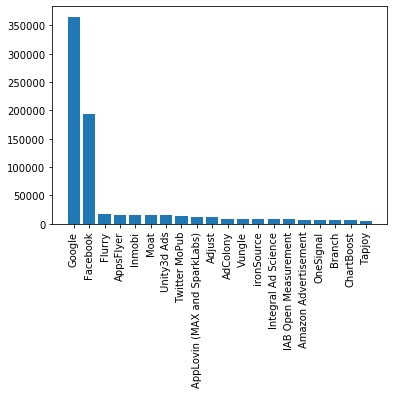

In [26]:
# get top 20 most used trackers
NFirst_Result = getNFirstElement(result, 20)
print("Most used trackers:")
print(NFirst_Result)

# get histo
plt.bar(list(NFirst_Result.keys()), NFirst_Result.values())
plt.xticks(rotation="vertical")
plt.show()

In [23]:
market_share = 0
for key in result.keys():
    market_share += result[key]
google_MS = result["Google"]/market_share
squared_shares = google_MS*100
squared_shares**=2
print(squared_shares) 


1534.3586999623508


In [24]:
# get pie chart of different categories
catResult = {}

for track in tuple_trackers:
    if track[0] != "000":
        key = ast.literal_eval(data_trackers[track[0]][0]) # convert str to dictionary
        for categories in key["categories"]:

            if categories and categories in catResult.keys():
                catResult[categories] += 1
            else:
                catResult[categories] = 1

# nb of times each category of tracker is used
print(catResult)

{'Analytics': 182, 'Advertisement': 103, 'Crash reporting': 10, 'Identification': 20, 'Profiling': 47, 'Location': 56}


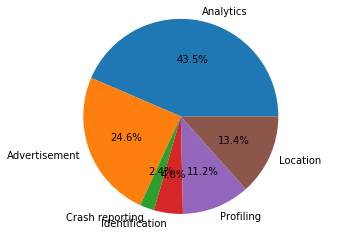

In [25]:
# get pie chart
fig, ax = plt.subplots()
ax.pie(catResult.values(), labels=catResult.keys(), autopct="%1.1f%%")
ax.axis("equal")  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

# Indice de Herfindahl Hirschmann